# Comparing Clustering Algorthims Using Simulated Data and the Iris Dataset

This kernel serves as an exploratory analysis to compare several clustering algorithms against each other in different simulated scenarios before finally applying them towards a real dataset in the Iris dataset. The 4 clustering algorithms which we will explore have been decided after careful research on the following articles: "10 Clustering Algorithms With Python" and "The 5 Clustering Algorithms Data Scientists Need to Know". The 4 algorithms which will be compared are based upon popularity and include:
* K-means Clustering - Using the 'kmeans' function from the Stats package in R
* Hierarchical Clustering
* Model-based Clustering Using Guassian Mixture Models
* Density-based Spacial Clustering of Applications with Noise (DBSCAN)

Table of Contents: <br>
&emsp; [Three Distinct Clusters](#3_clusts) <br>
&emsp; [Three Less Distinct Clusters](#3_less_clusts) <br>
&emsp; [Three Stripes](#3_stripes) <br>
&emsp; [Three Rings](#3_rings) <br>

In [58]:
library(MASS)
library(dbscan)
library(ggplot2)
library(repr)
library(gridExtra)
library(meanShiftR)
library(mclust)
library(factoextra)
set.seed(1055)

<a id='3_clusts'></a>
# Three Distinct Clusters
We will start by clustering on a clear-cut simulated dataset with 3 distinct groupings. This is performed by generating data from the normal distribution for both the X and Y axes, we generate three groups at $\mu$ = 1, 5, and 8 with $\sigma = 0.8$ for all clusters. We set the $\sigma$ value to be low so that there is no overlap between the groups, we expect all the clustering algorithms to perform well in this scenario.

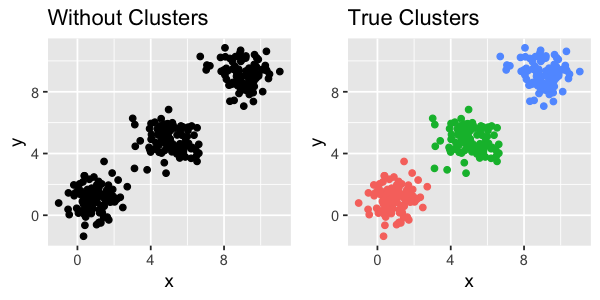

In [2]:
options(repr.plot.width=5, repr.plot.height=2.5)
x = rnorm(100,1,.8)
y = rnorm(100,1,.8)
one = rep(1,100)
clust1 = cbind(one,x,y)
x = rnorm(100,5,.8)
y = rnorm(100,5,.8)
two = rep(2,100)
clust2 = cbind(two,x,y)
x = rnorm(100,9,.8)
y = rnorm(100,9,.8)
three = rep(3,100)
clust3 = cbind(three,x,y)
df1 = rbind(clust1,clust2,clust3)
df1 = data.frame(df1)
p1 = ggplot(df1,aes(x=x,y=y))+geom_point()+ggtitle('Without Clusters')
p2 = ggplot(df1,aes(x=x,y=y,color=as.factor(one)))+geom_point()+theme(legend.position = "none")+ggtitle('True Clusters')
grid.arrange(p1,p2,nrow = 1)

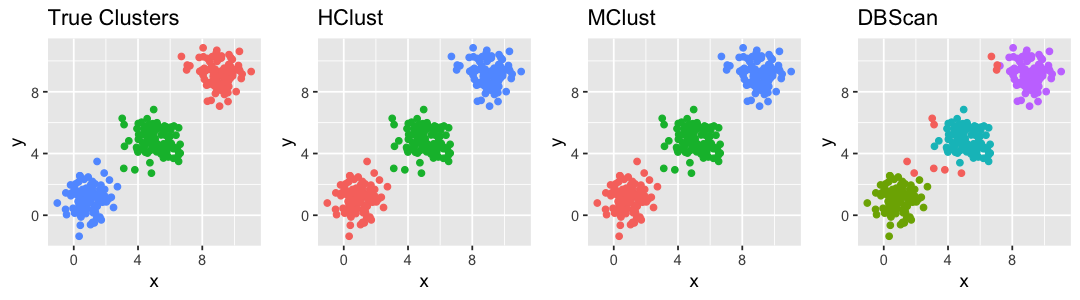

In [97]:
options(repr.plot.width=9, repr.plot.height=2.5)
km = kmeans(df1,centers=3)
p1 = ggplot(df1,aes(x=x,y=y,color=as.factor(km$cluster)))+geom_point()+theme(legend.position = "none")+ggtitle('K-Means')+ggtitle('True Clusters')
dists = dist(df1)
hc = hclust(dists,'complete')
ct = cutree(hc,3)
p2 =ggplot(df1,aes(x=x,y=y,color=as.factor(ct)))+geom_point()+theme(legend.position = "none")+ggtitle('HClust') 
mc = Mclust(df1,3)
p3 =ggplot(df1,aes(x=x,y=y,color=as.factor(mc$classification)))+geom_point()+theme(legend.position="none")+ggtitle('MClust') 
dbs=dbscan(df1,eps = .8,minPts = 6)
p4 = ggplot(df1,aes(x=x,y=y,color=as.factor(dbs$cluster)))+geom_point()+theme(legend.position="none")+ggtitle('DBScan')
grid.arrange(p1,p2,p3,p4,nrow = 1)

<a id='3_less_clusts'></a>
# Three Less Distinct Clusters
In this example, we increase the variation of the clusters so that there is more overlap between groups. This creates a more difficult dataset for clustering algorithms to predict.

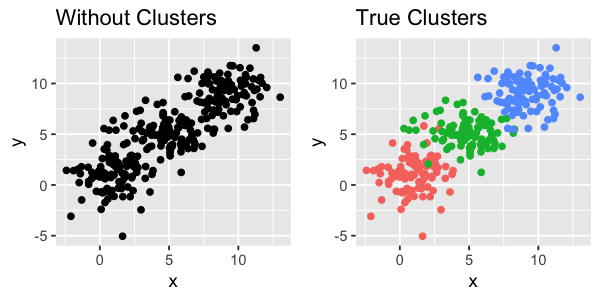

In [3]:
options(repr.plot.width=5, repr.plot.height=2.5)
x = rnorm(100,1,1.5)
y = rnorm(100,1,1.5)
one = rep(1,100)
clust1 = cbind(one,x,y)
x = rnorm(100,5,1.5)
y = rnorm(100,5,1.5)
two = rep(2,100)
clust2 = cbind(two,x,y)
x = rnorm(100,9,1.5)
y = rnorm(100,9,1.5)
three = rep(3,100)
clust3 = cbind(three,x,y)
df2 = rbind(clust1,clust2,clust3)
df2 = data.frame(df2)
p1 = ggplot(df2,aes(x=x,y=y))+geom_point()+ggtitle('Without Clusters') 
p2 = ggplot(df2,aes(x=x,y=y,color=as.factor(one)))+geom_point()+theme(legend.position = "none")+ggtitle('True Clusters') 
grid.arrange(p1,p2,nrow = 1)

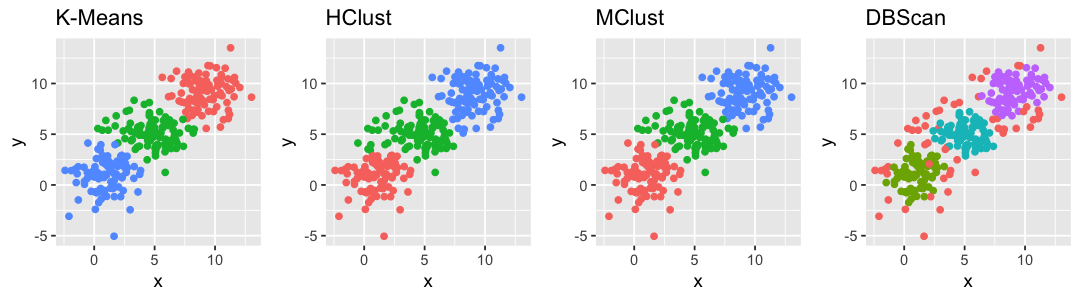

In [30]:
options(repr.plot.width=9, repr.plot.height=2.5)
km = kmeans(df2,centers=3)
p1 = ggplot(df2,aes(x=x,y=y,color=as.factor(km$cluster)))+geom_point()+theme(legend.position = "none")+ggtitle('K-Means')
dists = dist(df2)
hc = hclust(dists,'complete')
ct = cutree(hc,3)
p2 =ggplot(df2,aes(x=x,y=y,color=as.factor(ct)))+geom_point()+theme(legend.position = "none")+ggtitle('HClust') 
mc = Mclust(df2,3)
p3 =ggplot(df2,aes(x=x,y=y,color=as.factor(mc$classification)))+geom_point()+theme(legend.position="none")+ggtitle('MClust')
dbs=dbscan(df2,eps = .8,minPts = 6)
p4=ggplot(df2,aes(x=x,y=y,color=as.factor(dbs$cluster)))+geom_point()+theme(legend.position="none")+ggtitle('DBScan')
grid.arrange(p1,p2,p3,p4,nrow = 1)

<a id='3_stripes'></a>
# Three Stripes

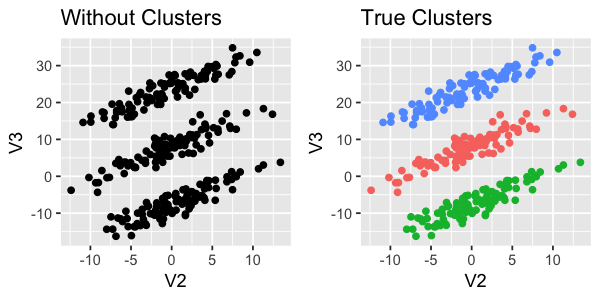

In [80]:
options(repr.plot.width=5, repr.plot.height=2.5)
dist1 = mvrnorm(100, c(0, 8), matrix(c(20, 18, 18, 20), nrow = 2))
dist2 = mvrnorm(100, c(0, -8), matrix(c(20, 18, 18, 20), nrow = 2))
dist3 = mvrnorm(100, c(0, 24), matrix(c(20, 18, 18, 20), nrow = 2))
labs1 = rep(1, 100)
labs2 = rep(2, 100)
labs3 = rep(3, 100)
clust1 = cbind(labs1,dist1)
clust2 = cbind(labs2,dist2)
clust3 = cbind(labs3,dist3)
df4 = rbind(clust1,clust2,clust3)
df4 = data.frame(df4)
p1 = ggplot(df4,aes(x=V2,y=V3))+geom_point()+ggtitle('Without Clusters') 
p2 = ggplot(df4,aes(x=V2,y=V3,color = as.factor(labs1)))+geom_point()+theme(legend.position = "none")+ggtitle('True Clusters')
grid.arrange(p1,p2,nrow = 1)

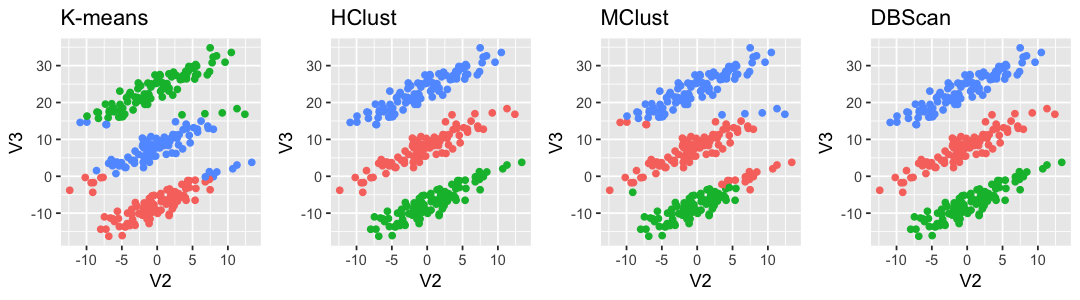

In [98]:
options(repr.plot.width=9, repr.plot.height=2.5)
#Initialize K-means
km = kmeans(df4,centers=3)
p1 = ggplot(df4,aes(x=V2,y=V3,color=as.factor(km$cluster)))+geom_point()+theme(legend.position = "none")+ggtitle('K-means') 
#Initialize Hclust
dists = dist(df4)
hc = hclust(dists,'single')
ct = cutree(hc,3)
p2 =ggplot(df4,aes(x=V2,y=V3,color=as.factor(ct)))+geom_point()+theme(legend.position = "none")+ggtitle('HClust') 
mc = Mclust(df4,3)
p3 =ggplot(df4,aes(x=V2,y=V3,color=as.factor(mc$classification)))+geom_point()+theme(legend.position="none")+ggtitle('MClust')
dbs=dbscan(df4,eps =4)
p4=ggplot(df4,aes(x=V2,y=V3,color=as.factor(dbs$cluster)))+geom_point()+theme(legend.position="none")+ggtitle('DBScan')
grid.arrange(p1,p2,p3,p4,nrow = 1)

<a id='3_rings'></a>
# Three Rings

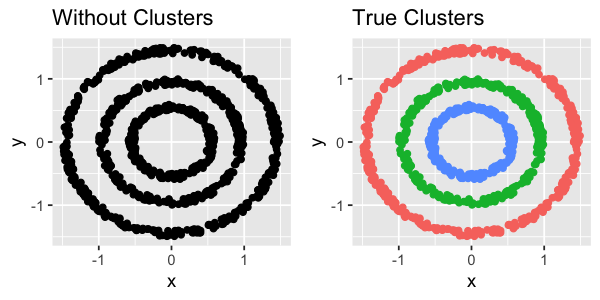

In [51]:
options(repr.plot.width=5, repr.plot.height=2.5)
outer = 1.5
inner = 1.4
n <- 400
rho <- sqrt(runif(n,inner^2,outer^2))
theta <- runif(n, 0, 2*pi)
x <- rho * cos(theta)
y <- rho * sin(theta)
labs = rep(1,400)
clust1 = cbind(labs,x,y)
outer = .6
inner = .5
outer = 1
inner = 0.9
n <- 300
rho <- sqrt(runif(n,inner^2,outer^2))
theta <- runif(n, 0, 2*pi)
x <- rho * cos(theta)
y <- rho * sin(theta)
labs = rep(2,300)
clust2 = cbind(labs,x,y)
outer = .6
inner = .5
n <- 200
rho <- sqrt(runif(n,inner^2,outer^2))
theta <- runif(n, 0, 2*pi)
x <- rho * cos(theta)
y <- rho * sin(theta)
labs = rep(3,200)
clust3 = cbind(labs,x,y)
df3 = rbind(clust1, clust2, clust3)
df3 = data.frame(df3)
p1 = ggplot(df3,aes(x=x,y=y))+geom_point()+ggtitle('Without Clusters') 
p2 = ggplot(df3,aes(x=x,y=y,color = as.factor(labs)))+geom_point()+theme(legend.position = "none")+ggtitle('True Clusters') 
grid.arrange(p1,p2,nrow = 1)

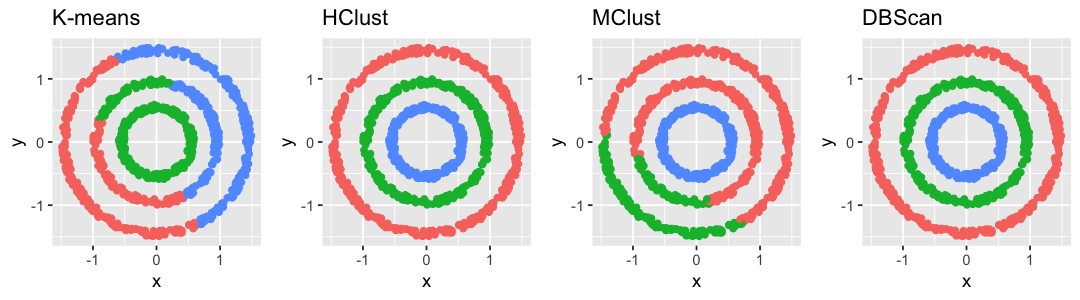

In [99]:
options(repr.plot.width=9, repr.plot.height=2.5)
#Initialize K-means
km = kmeans(df3,centers=3)
p1 = ggplot(df3,aes(x=x,y=y,color=as.factor(km$cluster)))+geom_point()+theme(legend.position = "none")+ggtitle('K-means') 
#Initialize Hclust
dists = dist(df3)
hc = hclust(dists,'single')
ct = cutree(hc,3)
p2 =ggplot(df3,aes(x=x,y=y,color=as.factor(ct)))+geom_point()+theme(legend.position = "none")+ggtitle('HClust') 
mc = Mclust(df3,3)
p3 =ggplot(df3,aes(x=x,y=y,color=as.factor(mc$classification)))+geom_point()+theme(legend.position="none")+ggtitle('MClust')
dbs=dbscan(df3,eps =.2,minPts = 5)
p4=ggplot(df3,aes(x=x,y=y,color=as.factor(dbs$cluster)))+geom_point()+theme(legend.position="none")+ggtitle('DBScan')
grid.arrange(p1,p2,p3,p4,nrow = 1)

# References
Seif, George. “The 5 Clustering Algorithms Data Scientists Need to Know.” Medium, Towards Data Science, 13 Dec. 2020, towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68.
<br>
<br>
Brownlee, Jason. “10 Clustering Algorithms With Python.” Machine Learning Mastery, 20 Aug. 2020, machinelearningmastery.com/clustering-algorithms-with-python/. 